In [16]:
# Add the parent directory to the path so that we can import the src module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [17]:
import src.visualization.plot3D as plot3D
from src.pingpong.table import TableConstants
from src.pingpong.ball import BallConstants
from src.ukf import StateVector, BallUKF, PoseMeasurementMode
from src.camera import CameraPose
from scipy.spatial.transform import Rotation

import numpy as np
import matplotlib.pyplot as plt

In [18]:
table = TableConstants() # Initialize table with defaults
ball = BallConstants() # Initialize ball with defaults

# Set the initial state of the ball
ball_state: StateVector = np.array([-1.5, 0.7, ball.radius + table.height, 0, 0, 0, 2, -1, 3, 0, 0, 0])
ball_states = [ball_state]

In [19]:
ukf = BallUKF(
    ball = ball,
    initial_state=ball_state,
    initial_state_covariance=np.eye(len(ball_state)) * 0.01,
    process_noise=np.eye(len(ball_state)) * 0.01,
    measurement_mode=PoseMeasurementMode(noise_matrix=np.eye(6) * 0.01)
)

# Predict future ball states using the kalman filter (without measurements)
dt = 0.01
for i in range(100):
    ball_state = ukf.predict(dt)
    ball_states.append(ukf.state)

In [20]:
# Define the camera pose, we will plot it
camera_position = np.array([0, -(table.length/2 + 2), table.height + 0.6])
camera_orientation = Rotation.from_euler('xyz', [-90, 0, 0], degrees=True)
camera = CameraPose(camera_position, camera_orientation, mirror_y=False)

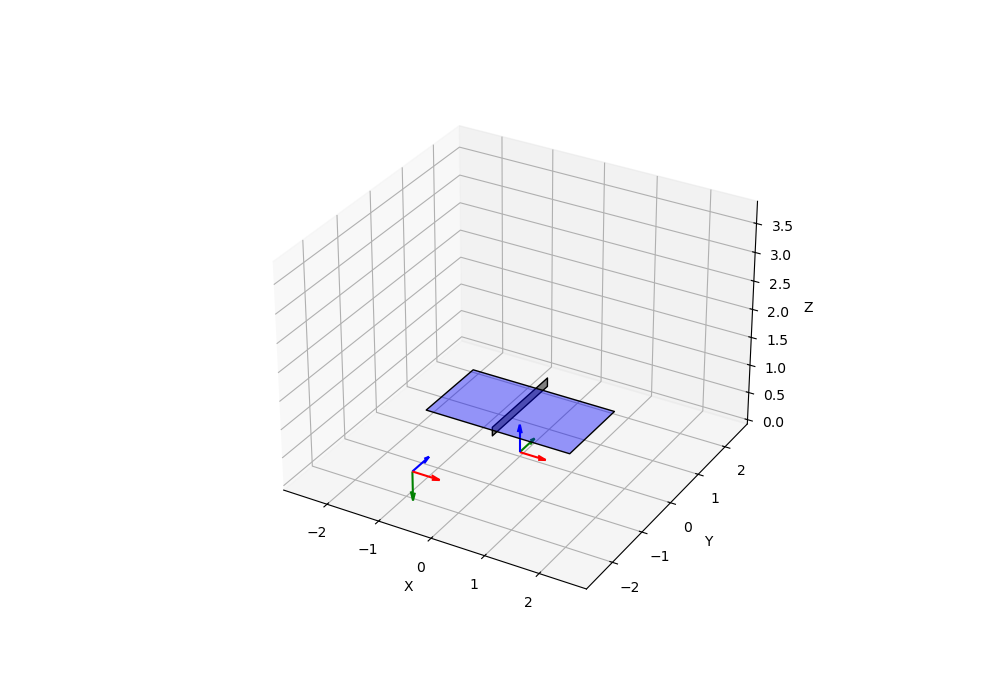

In [24]:
%matplotlib widget
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

plot3D.plot_table(ax, table, table_alpha=0.4, net_alpha=1)
plot3D.plot_camera(ax, camera)
plot3D.plot_axes_vectors(ax, [0,0,0], np.array([[1,0,0], [0,1,0], [0,0,1]]))

plt.show()

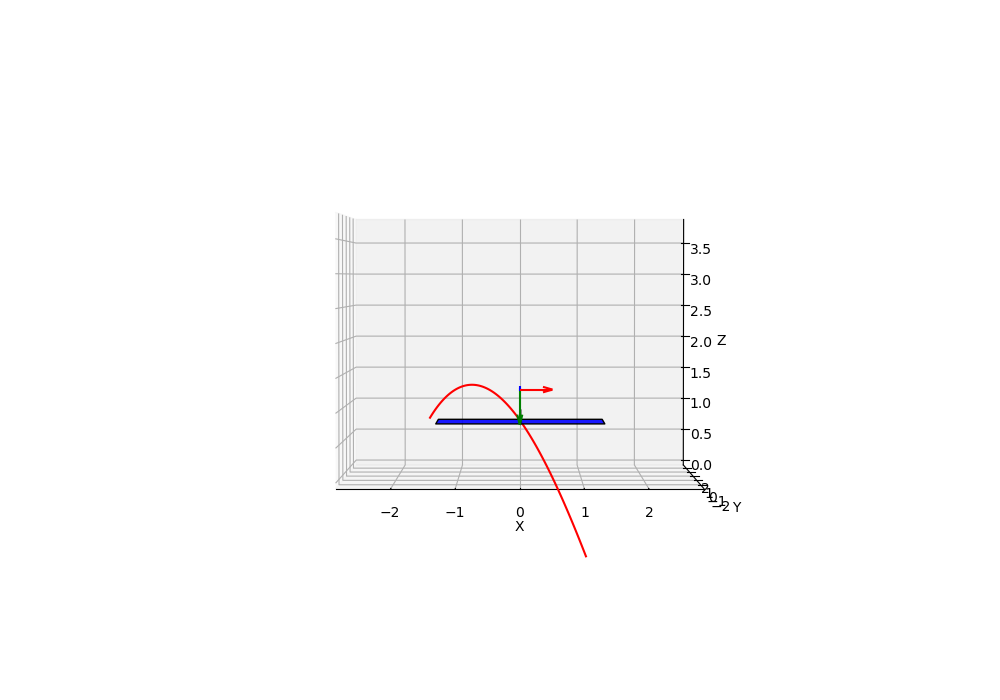

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

plot3D.plot_table(ax, table)
plot3D.plot_trajectory(ax, np.array(ball_states)[:,:3])
plot3D.plot_camera(ax, camera)
plot3D.view_from_camera_angle(ax, camera)
anim = plot3D.animate_trajectory(fig, ax, np.array(ball_states)[:, :3], dt, ball)
plt.show()